In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df = pd.read_csv('./insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [142]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,0,0,1
freq,676,1064,364


In [23]:
df.groupby('sex').size()

sex
female    662
male      676
dtype: int64

In [24]:
df.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

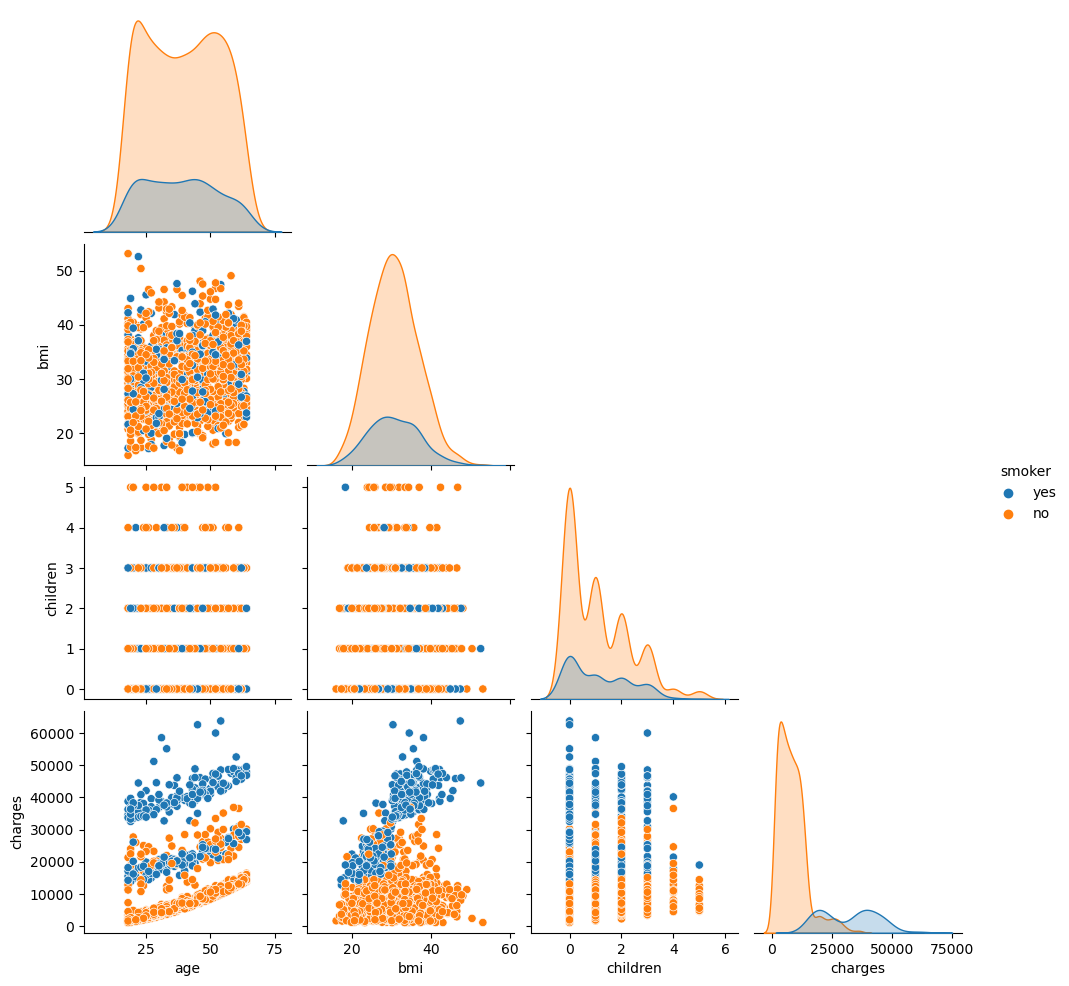

In [29]:
sns.pairplot(df, hue = 'smoker', corner = True)

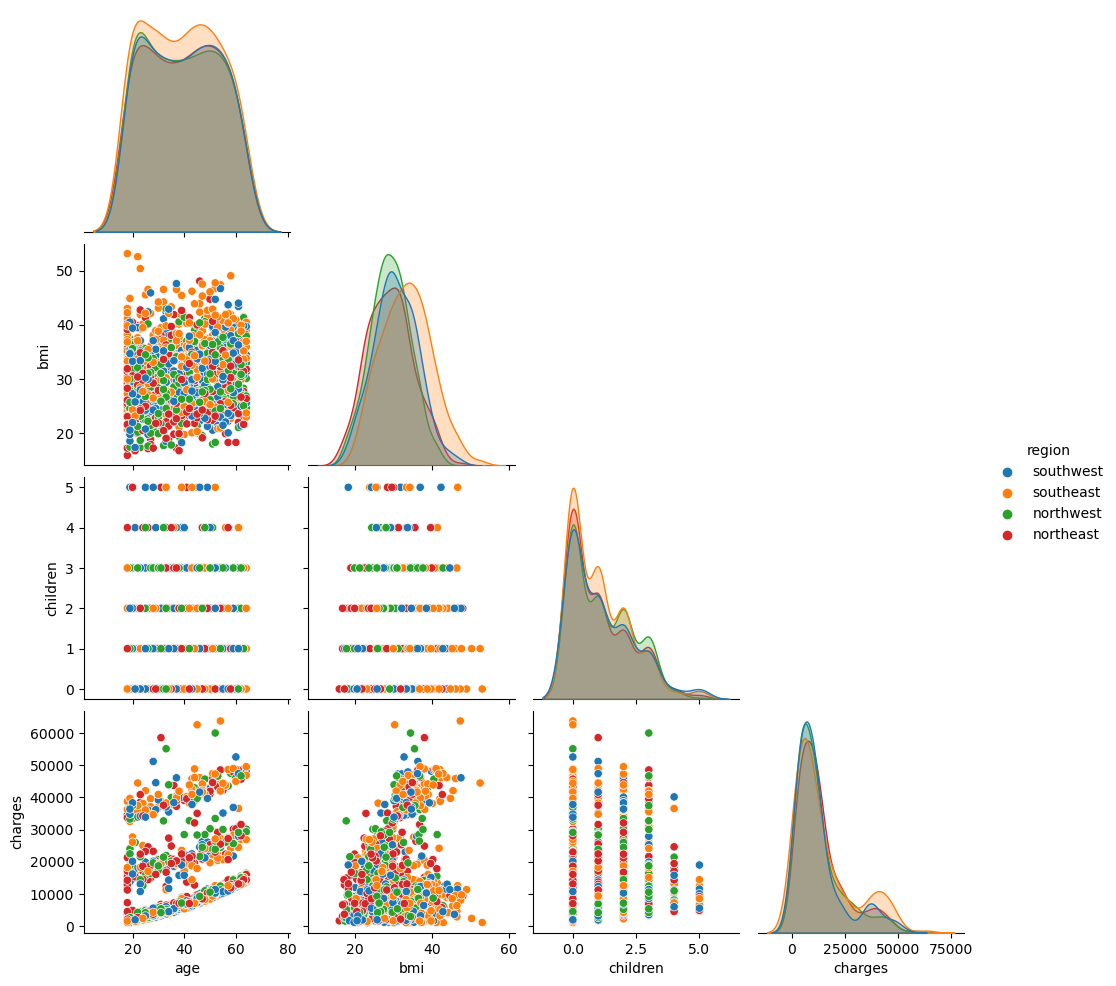

In [30]:
sns.pairplot(df, hue = 'region', corner = True)

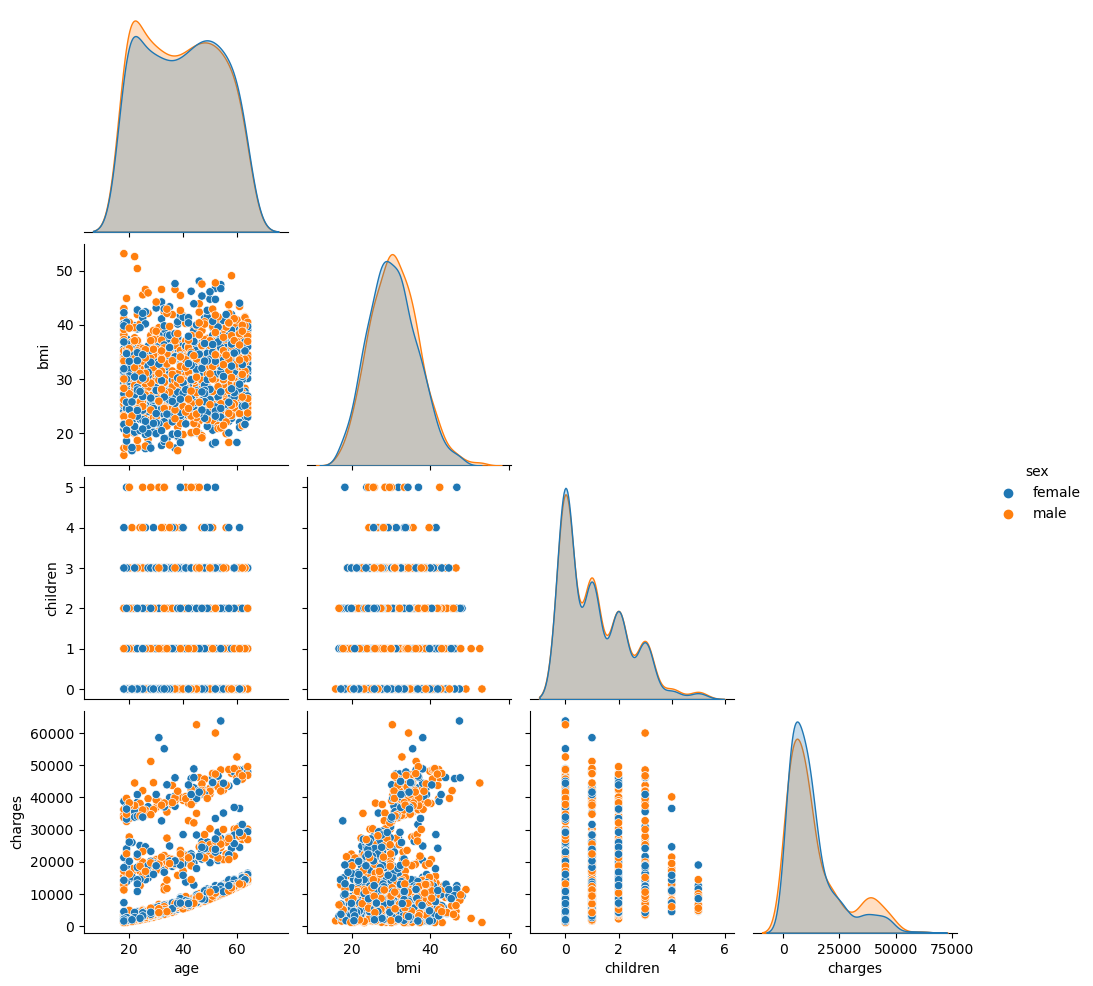

In [31]:
sns.pairplot(df, hue = 'sex', corner = True)

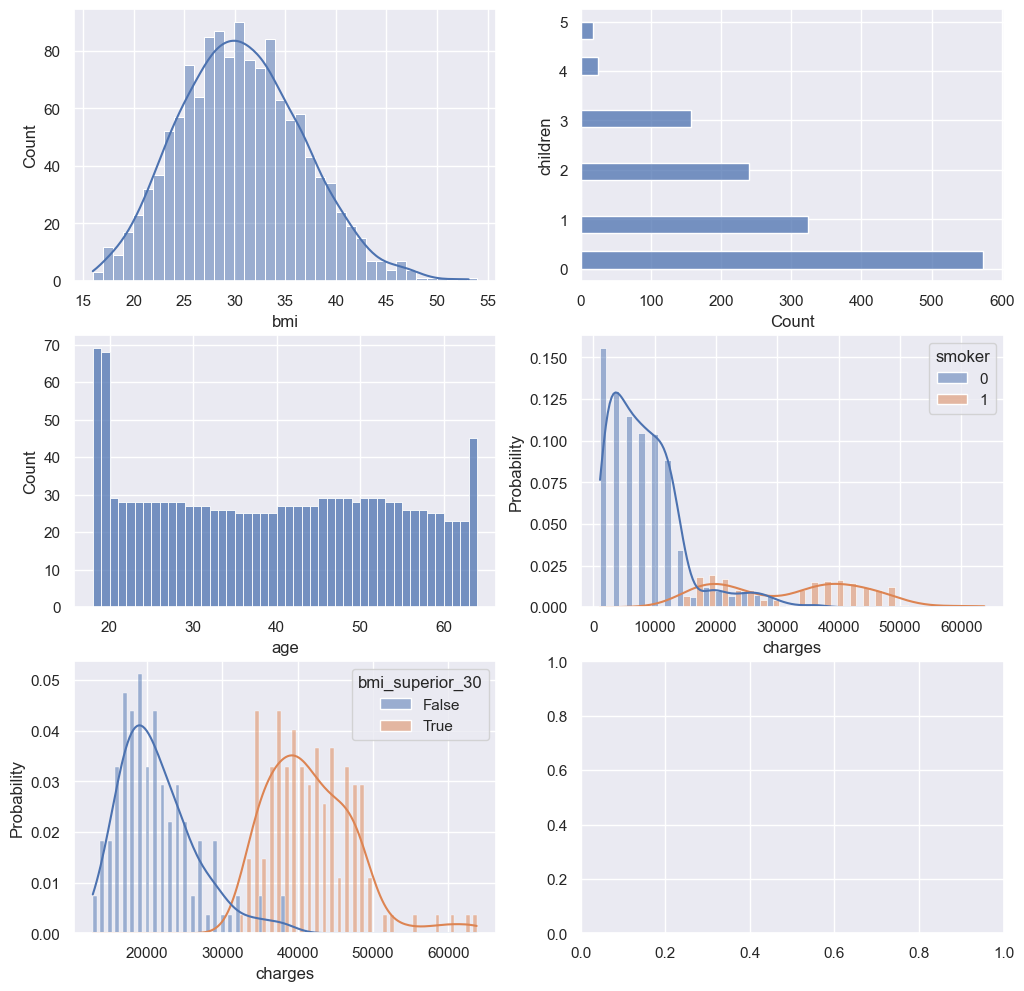

In [294]:
sns.set_theme()

f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.histplot(df['bmi'], ax = axes[0,0], kde=True, binwidth=1)
sns.histplot(y = df['children'], ax = axes[0,1])
sns.histplot(df['age'], ax = axes[1,0], binwidth = 1)
sns.histplot(data = df, x = 'charges', ax = axes[1,1], kde = True, hue = 'smoker', multiple = 'dodge', stat='probability')
sns.histplot(data = df.where(df['smoker'] ==  1).dropna(), x='charges', ax = axes[2,0], kde=True, hue='bmi_superior_30', multiple='dodge', stat='probability',binwidth=1000)
plt.show()

C:\Users\tonch\AppData\Local\Temp\ipykernel_44020\1552645627.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(ax=ax, kind='box', subplots=True, layout=(2,2))


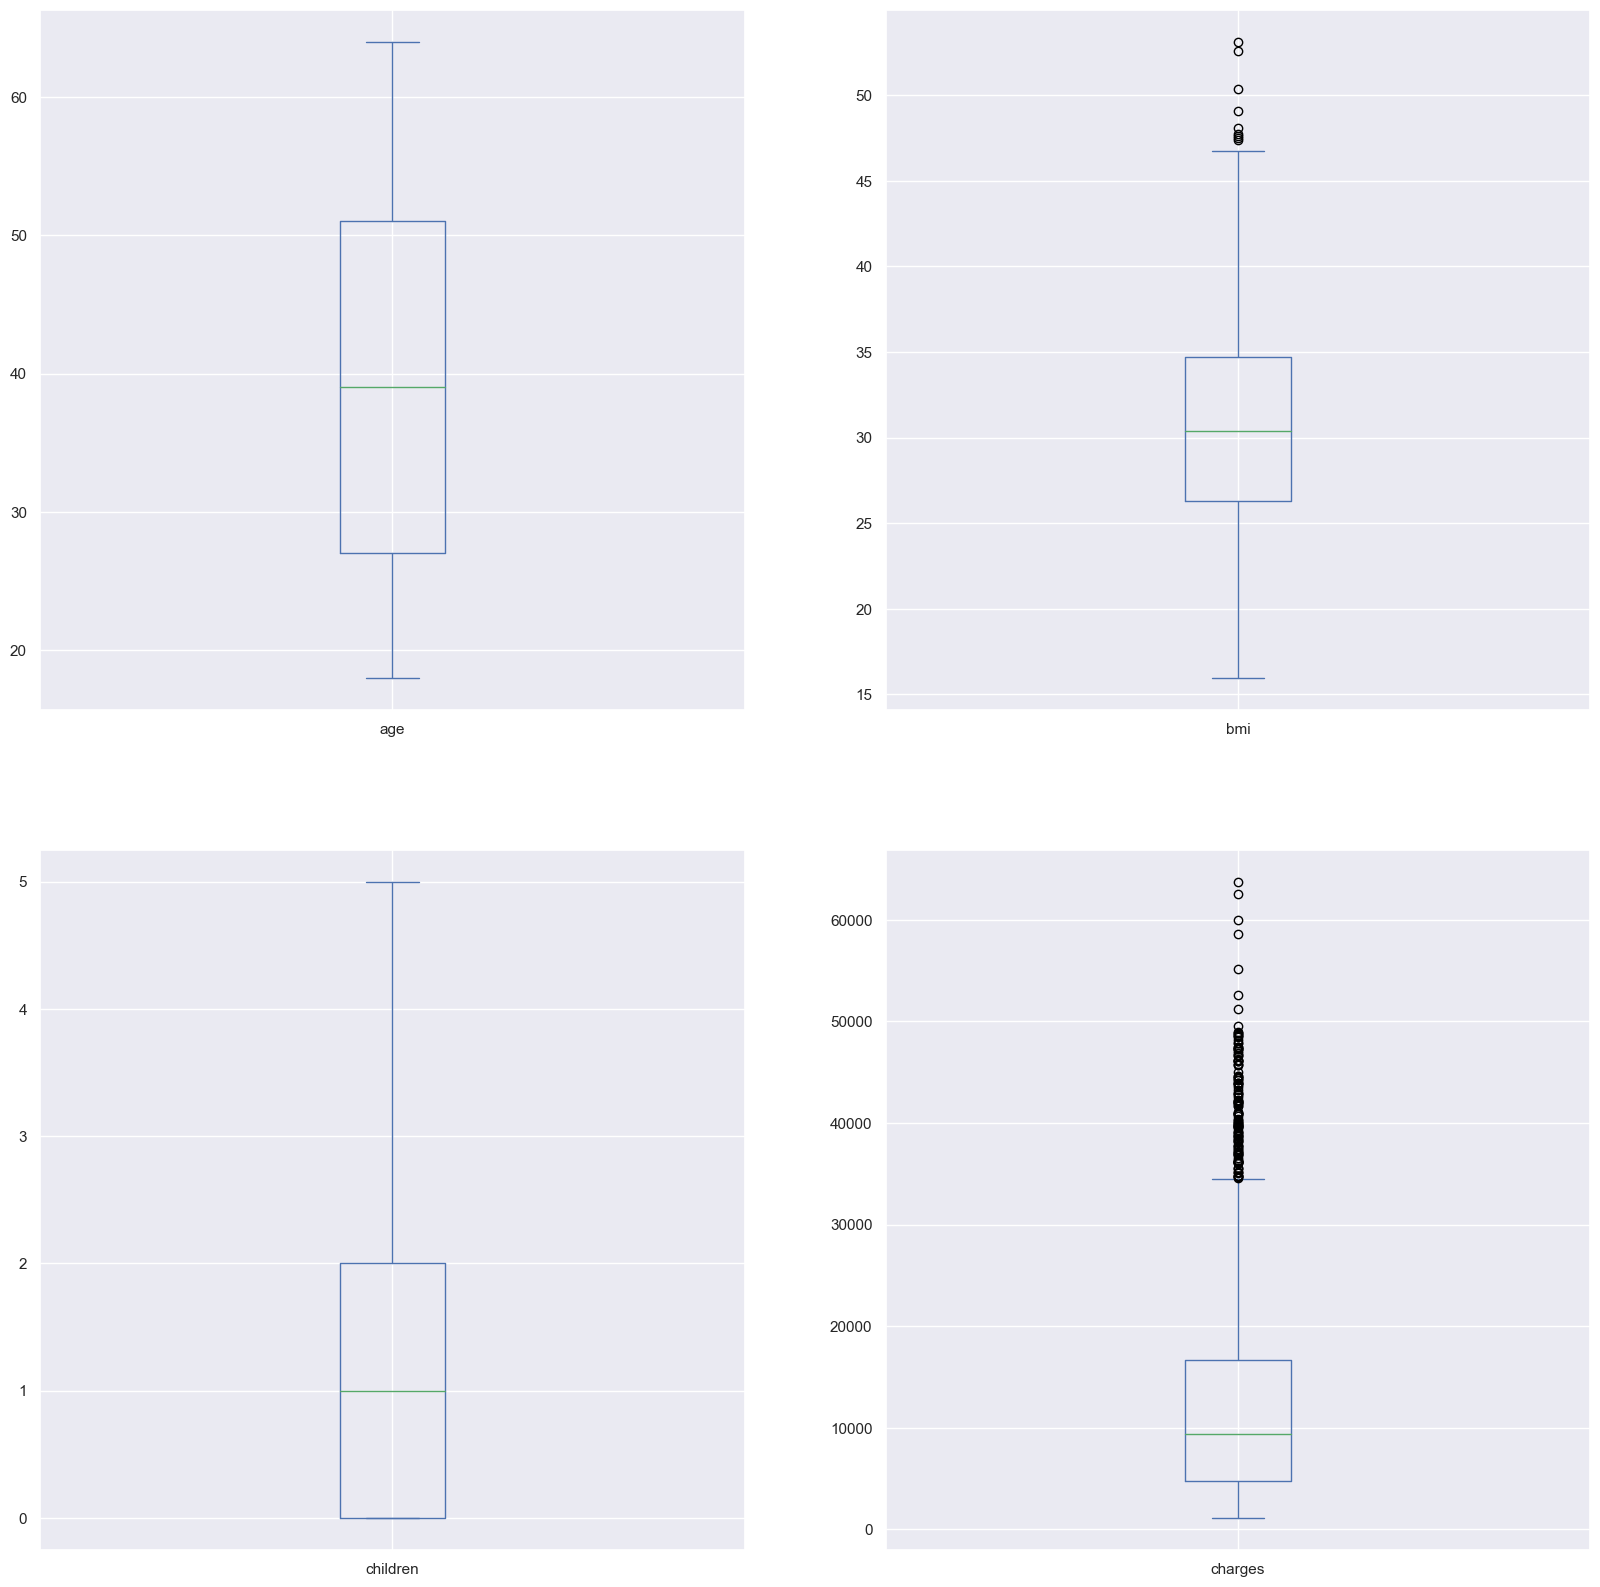

In [139]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.plot(ax=ax, kind='box', subplots=True, layout=(2,2))
plt.show()

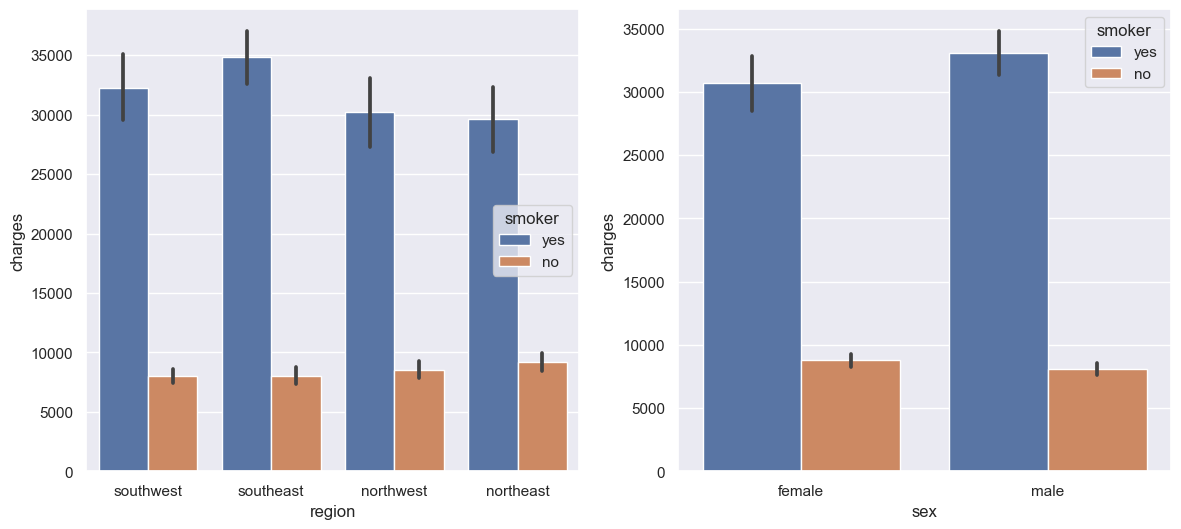

In [84]:
f, axes = plt.subplots(1, 2 , figsize=(14, 6))
sns.barplot(data=df, x='region', y='charges', hue='smoker', ax = axes[0])
sns.barplot(data=df, x='sex', y='charges', hue='smoker', ax = axes[1])

plt.show()

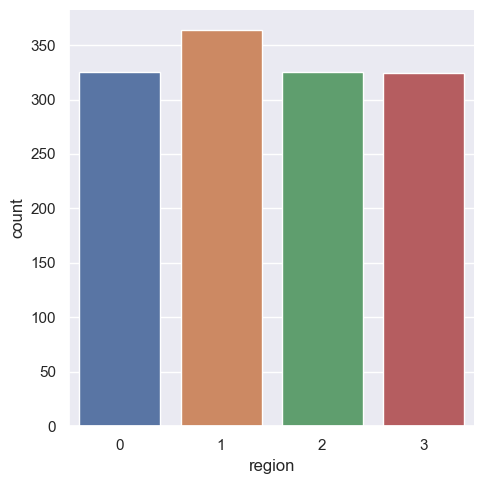

In [145]:
sns.catplot(data=df,
           x='region',
           kind='count')
plt.show()

In [88]:
df[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [147]:
#Range
df.max(numeric_only=True) - df.min(numeric_only=True)

age            46.00
bmi            37.17
children        5.00
charges     62648.55
dtype: float64

In [149]:
#Interquartile range
df[['age', 'bmi', 'children', 'charges']].quantile(0.75) - df[['age', 'bmi', 'children', 'charges']].quantile(0.25)

age            24.00
bmi             8.40
children        2.00
charges     11899.63
dtype: float64

In [306]:
df.sex.replace(['male', 'female'], [0, 1],inplace=True)
df.smoker.replace(['yes', 'no'], [1, 0])
df.region.replace(['southwest','southeast','northwest','northeast'], [0,1,2,3])

0       0
1       1
2       1
3       2
4       2
       ..
1333    2
1334    3
1335    1
1336    0
1337    2
Name: region, Length: 1338, dtype: int64

In [307]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.92
1,18,0,33.77,1,no,southeast,1725.55
2,28,0,33.00,3,no,southeast,4449.46
3,33,0,22.70,0,no,northwest,21984.47
4,32,0,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,no,northwest,10600.55
1334,18,1,31.92,0,no,northeast,2205.98
1335,18,1,36.85,0,no,southeast,1629.83
1336,21,1,25.80,0,no,southwest,2007.94


In [135]:
pd.options.display.precision = 2

In [136]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,0,16884.92
1,18,0,33.77,1,0,1,1725.55
2,28,0,33.00,3,0,1,4449.46
3,33,0,22.70,0,0,2,21984.47
4,32,0,28.88,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,2,10600.55
1334,18,1,31.92,0,0,3,2205.98
1335,18,1,36.85,0,0,1,1629.83
1336,21,1,25.80,0,0,0,2007.94


<AxesSubplot:xlabel='age', ylabel='charges'>

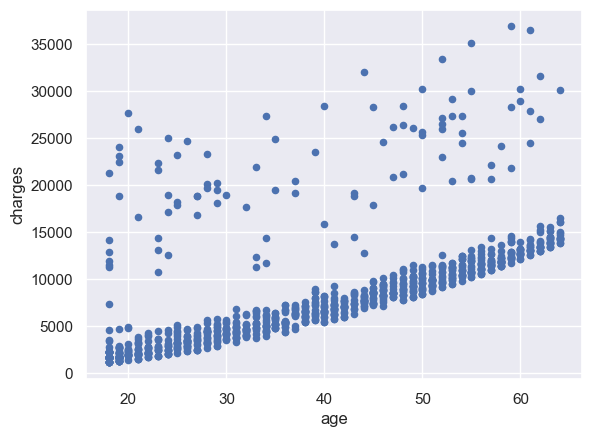

In [162]:
df.where(df['smoker'] == 0).dropna().plot(kind='scatter', x='age', y='charges')

<AxesSubplot:xlabel='age', ylabel='charges'>

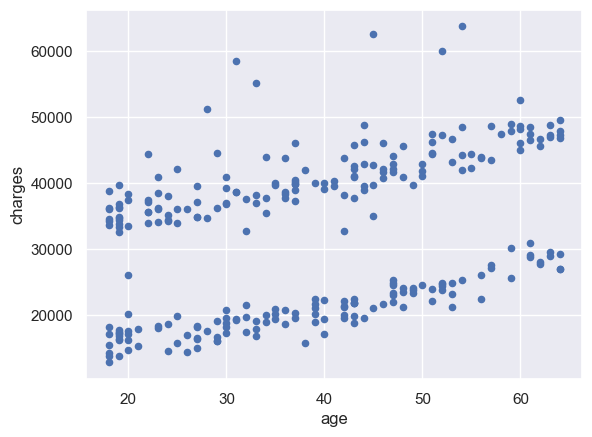

In [187]:
df.where(df['smoker'] == 1).dropna().plot(kind='scatter', x='age', y='charges')

<AxesSubplot:xlabel='age', ylabel='charges'>

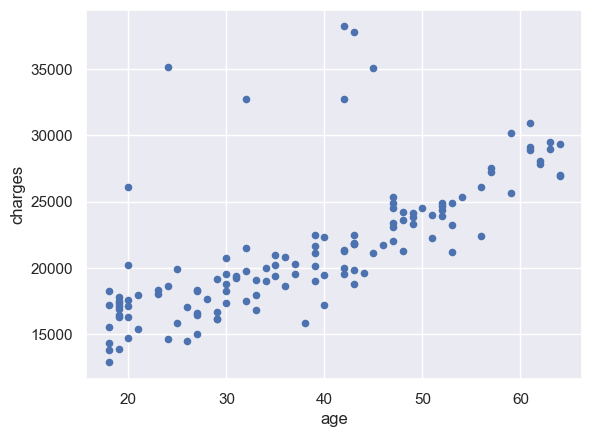

In [170]:
df.where((df['smoker'] == 1) & (df['bmi'] < 30)).dropna().plot(kind='scatter', x='age', y='charges')

In [199]:
df.where((df['smoker'] == 1) & (df['bmi'] < 30)).dropna()[['age', 'charges']].corr()

,age,charges
age,1.00,0.69
charges,0.69,1.00


<AxesSubplot:xlabel='age', ylabel='charges'>

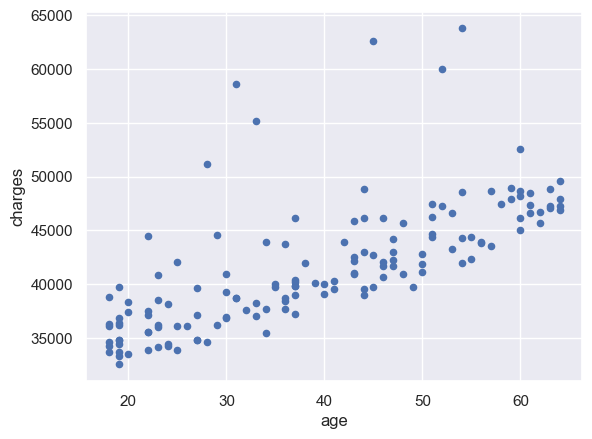

In [169]:
df.where((df['smoker'] == 1) & (df['bmi'] > 30)).dropna().plot(kind='scatter', x='age', y='charges')

In [200]:
df.where((df['smoker'] == 1) & (df['bmi'] > 30)).dropna()[['age', 'charges']].corr()

,age,charges
age,1.0,0.7
charges,0.7,1.0


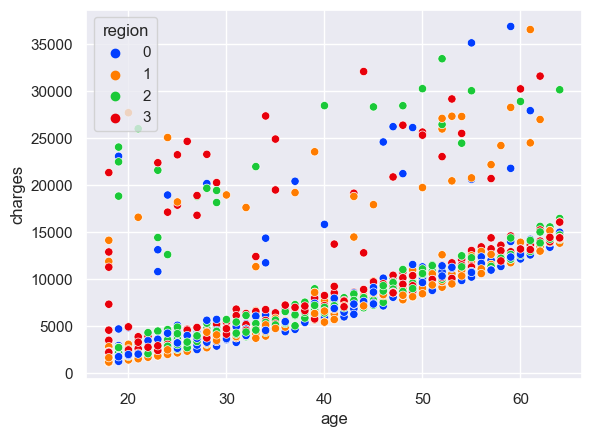

In [244]:
sns.scatterplot( 
    data = df.where(df['smoker'] == 0).dropna(),
    x='age',
    y='charges',
    hue='region',
    palette='bright'
)
plt.show()

In [282]:
df = df.assign(bmi_superior_30 = df['bmi'] > 30)
df = df.assign(age_superior_30 = df['age'] > 30)
df

,age,sex,bmi,children,smoker,region,charges,bmi_superior_30,age_superior_30
0,19,1,27.90,0,1,0,16884.92,False,False
1,18,0,33.77,1,0,1,1725.55,True,False
2,28,0,33.00,3,0,1,4449.46,True,False
3,33,0,22.70,0,0,2,21984.47,False,True
4,32,0,28.88,0,0,2,3866.86,False,True
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,2,10600.55,True,True
1334,18,1,31.92,0,0,3,2205.98,True,False
1335,18,1,36.85,0,0,1,1629.83,True,False
1336,21,1,25.80,0,0,0,2007.94,False,False


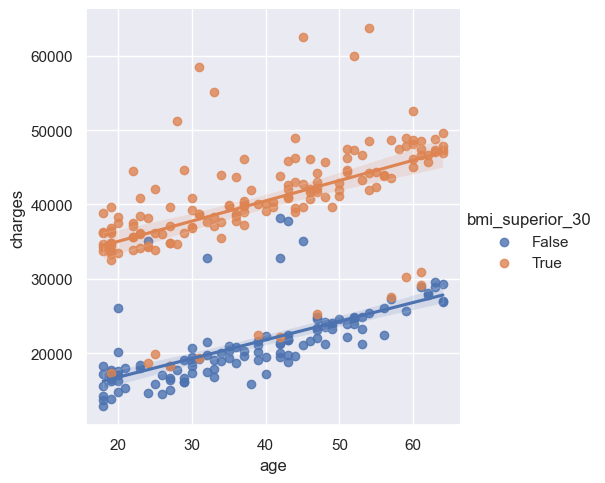

In [259]:
sns.lmplot(
    data=df.where((df['smoker'] == 1)).dropna(),
    x='age',
    y='charges',
    hue='bmi_superior_30'
)

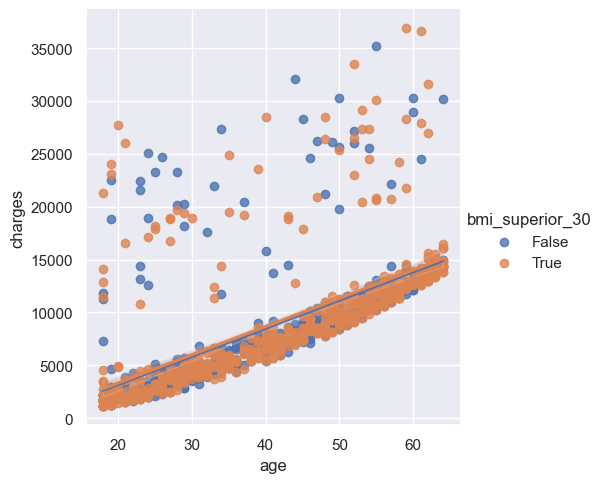

In [271]:
sns.lmplot(
    data=df.where((df['smoker'] == 0)).dropna(),
    x='age',
    y='charges',
    hue='bmi_superior_30'
)

In [277]:
df.where(df['smoker'] == 0).groupby(by='bmi_superior_30').count()

,age,sex,bmi,children,smoker,region,charges
bmi_superior_30,,,,,,,
False,503,503,503,503,503,503,503
True,561,561,561,561,561,561,561


<AxesSubplot:xlabel='children', ylabel='charges'>

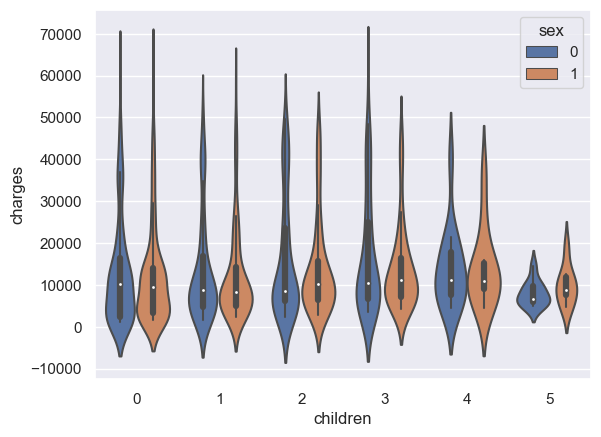

In [288]:
sns.violinplot(
    data=df,
    x='children',
    y='charges',
    hue='sex'
)

<AxesSubplot:xlabel='region', ylabel='charges'>

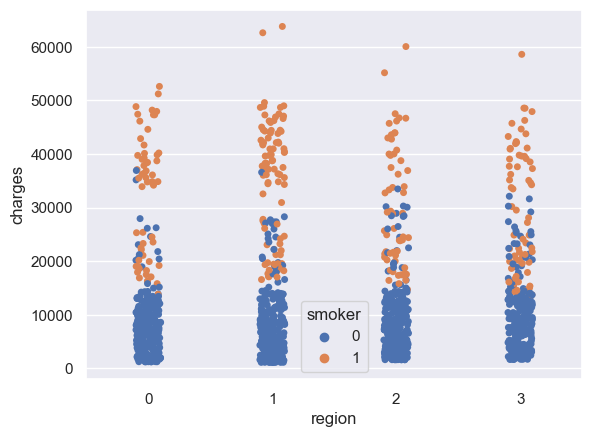

In [302]:
sns.stripplot(
    data=df,
    x='region',
    y='charges',
    hue='smoker' 
)
